In [21]:
import numpy as np
import pandas as pd

import gensim
from gensim import corpora

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
jobs_df = pd.read_csv("/content/drive/MyDrive/LISTLY_GROUP_www.teambl_E7fUxaBW_LATEST_20230527.csv")
jobs_df

,TASKKEY,PAGE_URL,LABEL-1,LABEL-2,LABEL-3,LABEL-4,LABEL-5,LABEL-6,LABEL-7,LABEL-8,...,LABEL-30,LABEL-31,LABEL-32,LABEL-33,LABEL-34,LABEL-35,LABEL-36,LABEL-37,LABEL-38,LABEL-39
0,OVbuZpAF,https://www.teamblind.com/company/Google/revie...,NaN,NaN,NaN,Rating Score5.0,5.0,3.0,3Career Growth,4.0,...,More Menu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OVbuZpAF,https://www.teamblind.com/company/Google/revie...,NaN,NaN,NaN,Rating Score3.0,3.0,3.0,3Career Growth,3.0,...,More Menu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OVbuZpAF,https://www.teamblind.com/company/Google/revie...,NaN,NaN,NaN,Rating Score5.0,5.0,4.0,4Career Growth,5.0,...,More Menu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OVbuZpAF,https://www.teamblind.com/company/Google/revie...,NaN,NaN,NaN,Rating Score4.0,4.0,3.0,3Career Growth,5.0,...,More Menu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OVbuZpAF,https://www.teamblind.com/company/Google/revie...,NaN,NaN,NaN,Rating Score5.0,5.0,3.0,3Career Growth,5.0,...,More Menu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,Kn8eF8s3,https://www.teamblind.com/company/Google/revie...,NaN,NaN,NaN,Rating Score4.0,4.0,3.0,3Career Growth,4.0,...,More Menu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,Kn8eF8s3,https://www.teamblind.com/company/Google/revie...,NaN,NaN,NaN,Rating Score5.0,5.0,4.0,4Career Growth,5.0,...,More Menu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,Kn8eF8s3,https://www.teamblind.com/company/Google/revie...,NaN,NaN,NaN,Rating Score4.0,4.0,2.0,2Career Growth,5.0,...,More Menu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
494,Kn8eF8s3,https://www.teamblind.com/company/Google/revie...,NaN,NaN,NaN,Rating Score4.0,4.0,3.0,3Career Growth,4.0,...,More Menu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pros

In [23]:
pros = jobs_df["LABEL-21"]
pros.dropna(inplace=True)

In [24]:
# Tokenize the text
tokenized_data = [[word for word in gensim.utils.simple_preprocess(document) if word not in stopwords] for document in pros]

# Create dictionary from tokenized data
dictionary = corpora.Dictionary(tokenized_data)

# Create corpus from dictionary and tokenized data
corpus = [dictionary.doc2bow(document) for document in tokenized_data]

In [25]:
# Create the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=10,
                                            random_state=100,
                                            update_every=1,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [26]:
# Print the topics
for topic in lda_model.print_topics():
    print(topic)

(0, '0.034*"good" + 0.025*"great" + 0.024*"wlb" + 0.022*"team" + 0.020*"benefits" + 0.020*"decent" + 0.017*"compensation" + 0.016*"people" + 0.012*"perks" + 0.011*"pay"')
(1, '0.044*"good" + 0.023*"opportunities" + 0.022*"learn" + 0.022*"people" + 0.018*"great" + 0.015*"smart" + 0.015*"wlb" + 0.014*"tech" + 0.012*"lots" + 0.010*"stack"')
(2, '0.032*"good" + 0.020*"people" + 0.019*"wlb" + 0.015*"company" + 0.015*"great" + 0.014*"work" + 0.013*"still" + 0.013*"benefits" + 0.012*"colleagues" + 0.012*"really"')
(3, '0.089*"good" + 0.051*"wlb" + 0.034*"great" + 0.032*"perks" + 0.029*"food" + 0.023*"nice" + 0.016*"free" + 0.016*"friendly" + 0.014*"team" + 0.014*"comp"')
(4, '0.085*"work" + 0.069*"good" + 0.061*"great" + 0.046*"life" + 0.045*"balance" + 0.025*"people" + 0.024*"perks" + 0.021*"benefits" + 0.018*"culture" + 0.015*"smart"')
(5, '0.025*"good" + 0.014*"work" + 0.013*"easy" + 0.012*"compensation" + 0.012*"companies" + 0.011*"manager" + 0.009*"still" + 0.009*"smart" + 0.009*"product

In [27]:
# Get the topics and their associated keywords
topics = lda_model.print_topics(num_topics=10, num_words=5)

# Format and print the topics
for topic_num, topic_words in topics:
    words = topic_words.split('+')
    keywords = [word.split('*')[1].strip().replace('"', '') for word in words]
    topic_str = f"Topic {topic_num}: {' | '.join(keywords)}"
    print(topic_str)

Topic 0: good | great | wlb | team | benefits
Topic 1: good | opportunities | learn | people | great
Topic 2: good | people | wlb | company | great
Topic 3: good | wlb | great | perks | food
Topic 4: work | good | great | life | balance
Topic 5: good | work | easy | compensation | companies
Topic 6: good | people | get | place | comp
Topic 7: great | culture | benefits | good | people
Topic 8: compensation | great | benefits | smart | good
Topic 9: great | work | company | life | google


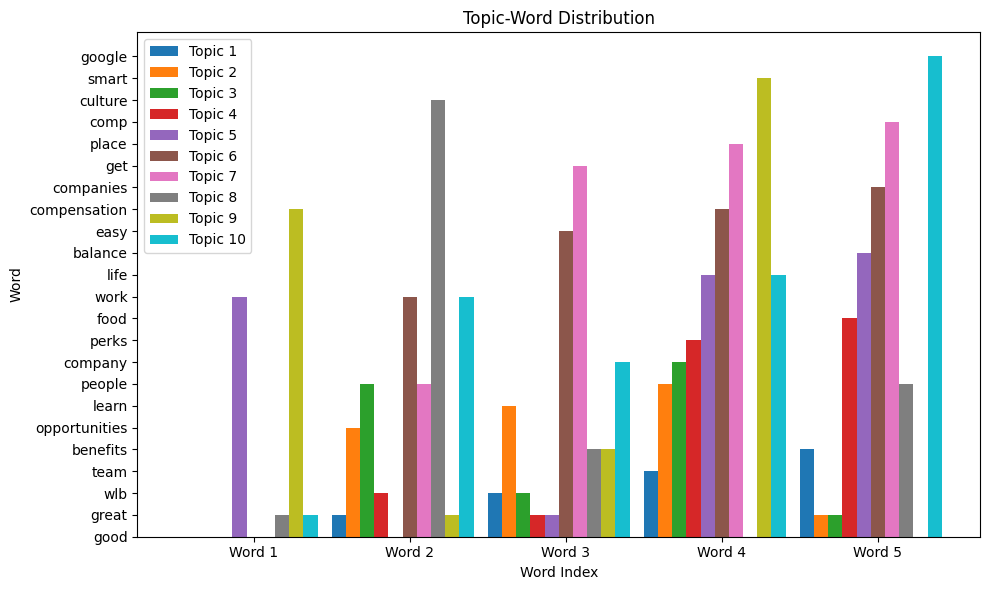

In [28]:
import matplotlib.pyplot as plt

# Assuming you have already trained the LDA model and stored it in lda_model

# Define the number of topics and top N words to display
num_topics = 10
top_n_words = 5

# Get the topics and their associated keywords
topics = lda_model.print_topics(num_topics=num_topics, num_words=top_n_words)

# Extract the keywords for each topic
topic_keywords = []
for topic_num, topic_words in topics:
    keywords = [word.split('*')[1].strip().replace('"', '') for word in topic_words.split('+')]
    topic_keywords.append(keywords)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
index = range(top_n_words)
bar_width = 1.0 / (num_topics + 1)

for i, keywords in enumerate(topic_keywords):
    ax.bar([w + i * bar_width for w in index], keywords, bar_width, label=f"Topic {i + 1}")

# Add labels and title
ax.set_xlabel('Word Index')
ax.set_ylabel('Word')
ax.set_title('Topic-Word Distribution')

# Add x-axis ticks and labels
ax.set_xticks([w + bar_width * (num_topics / 2) for w in index])
ax.set_xticklabels([f"Word {i + 1}" for i in index])

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

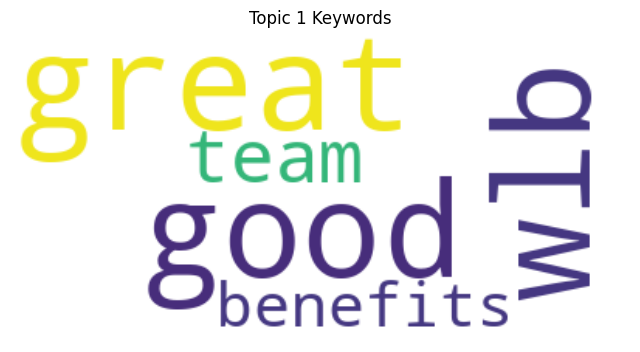

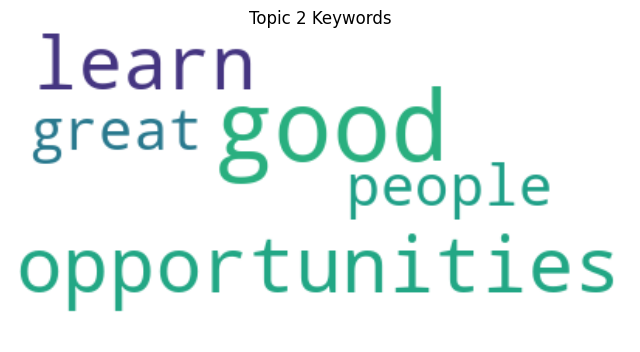

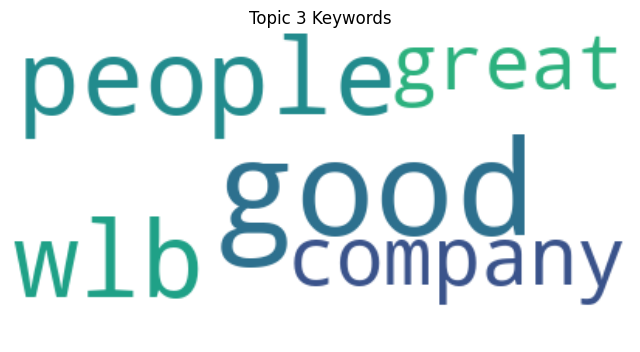

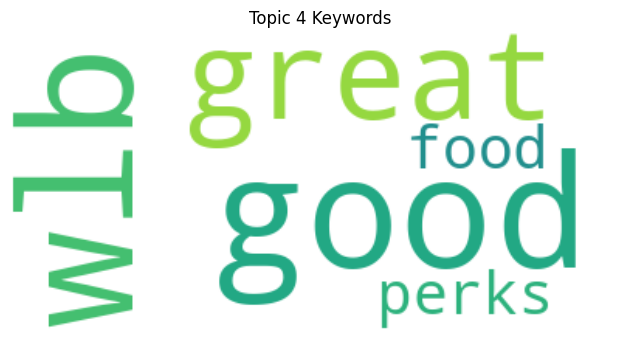

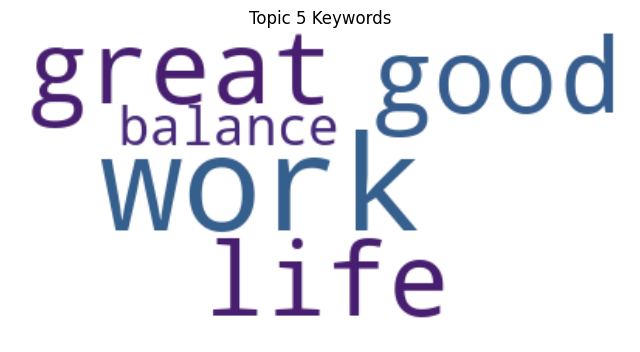

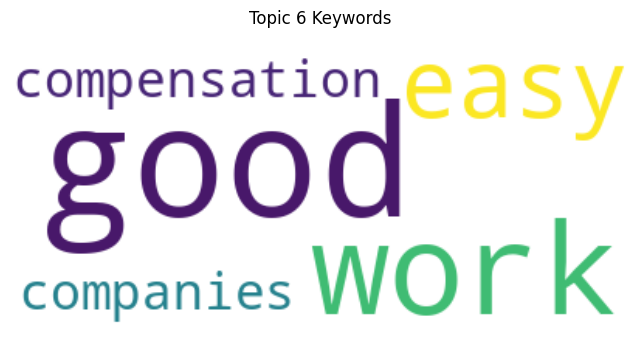

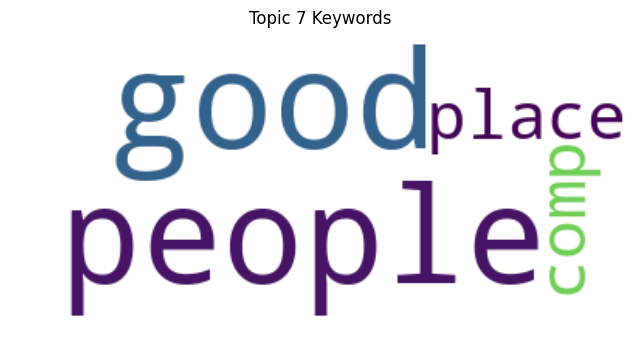

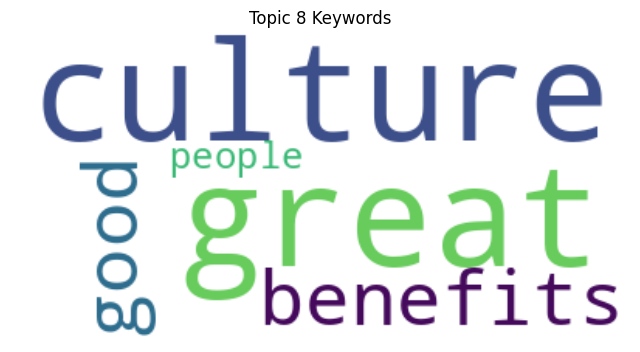

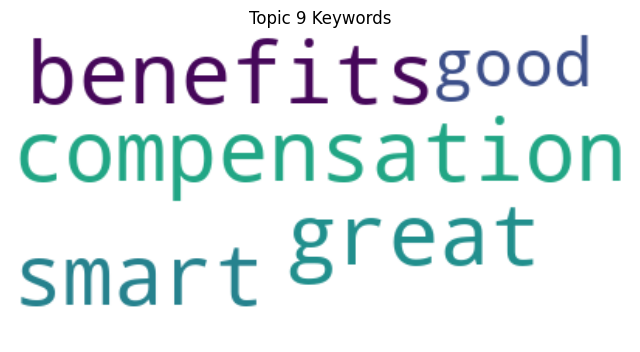

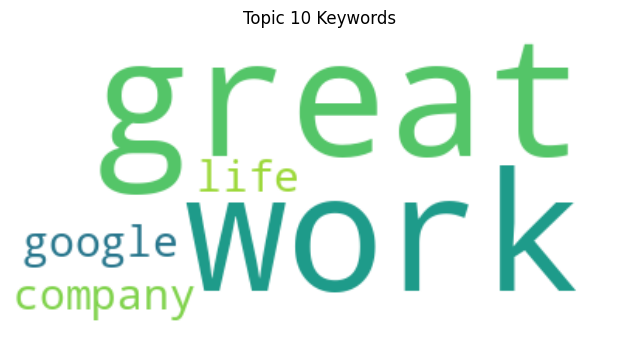

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already trained the LDA model and stored it in lda_model

# Define the number of topics and top N words to display
num_topics = 10
top_n_words = 5

# Get the topics and their associated keywords
topics = lda_model.print_topics(num_topics=num_topics, num_words=top_n_words)

# Create word cloud for each topic
for topic_num, topic_words in topics:
    keywords = [word.split('*')[1].strip().replace('"', '') for word in topic_words.split('+')]
    wordcloud = WordCloud(background_color='white').generate(' '.join(keywords))

    # Plot the word cloud
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_num + 1} Keywords')
    plt.show()

## Cons

In [30]:
cons = jobs_df["LABEL-23"]
cons.dropna(inplace=True)

In [31]:
# Tokenize the text
tokenized_data = [[word for word in gensim.utils.simple_preprocess(document) if word not in stopwords] for document in cons]

# Create dictionary from tokenized data
dictionary = corpora.Dictionary(tokenized_data)

# Create corpus from dictionary and tokenized data
corpus = [dictionary.doc2bow(document) for document in tokenized_data]

In [32]:
# Create the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=10,
                                            random_state=100,
                                            update_every=1,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [33]:
# Print the topics
for topic in lda_model.print_topics():
    print(topic)

(0, '0.016*"leadership" + 0.014*"org" + 0.014*"team" + 0.013*"management" + 0.013*"work" + 0.010*"many" + 0.010*"company" + 0.008*"culture" + 0.007*"slow" + 0.006*"much"')
(1, '0.018*"culture" + 0.014*"slow" + 0.014*"big" + 0.013*"lots" + 0.011*"company" + 0.011*"growth" + 0.010*"leadership" + 0.009*"less" + 0.007*"much" + 0.007*"work"')
(2, '0.027*"slow" + 0.023*"lot" + 0.016*"google" + 0.016*"growth" + 0.015*"process" + 0.013*"career" + 0.012*"work" + 0.010*"bureaucracy" + 0.008*"new" + 0.008*"team"')
(3, '0.014*"work" + 0.012*"impact" + 0.012*"good" + 0.011*"company" + 0.011*"google" + 0.008*"hard" + 0.008*"difficult" + 0.008*"working" + 0.008*"leadership" + 0.008*"pay"')
(4, '0.030*"slow" + 0.023*"growth" + 0.021*"career" + 0.016*"much" + 0.015*"many" + 0.013*"management" + 0.013*"google" + 0.010*"leadership" + 0.010*"work" + 0.008*"business"')
(5, '0.014*"people" + 0.010*"management" + 0.010*"culture" + 0.008*"promotion" + 0.008*"top" + 0.008*"vest" + 0.008*"poor" + 0.008*"rest" +

In [34]:
# Get the topics and their associated keywords
topics = lda_model.print_topics(num_topics=10, num_words=5)

# Format and print the topics
for topic_num, topic_words in topics:
    words = topic_words.split('+')
    keywords = [word.split('*')[1].strip().replace('"', '') for word in words]
    topic_str = f"Topic {topic_num}: {' | '.join(keywords)}"
    print(topic_str)

Topic 0: leadership | org | team | management | work
Topic 1: culture | slow | big | lots | company
Topic 2: slow | lot | google | growth | process
Topic 3: work | impact | good | company | google
Topic 4: slow | growth | career | much | many
Topic 5: people | management | culture | promotion | top
Topic 6: culture | layoffs | company | team | management
Topic 7: management | work | bad | culture | bureaucracy
Topic 8: management | many | company | slow | career
Topic 9: management | hard | work | get | people


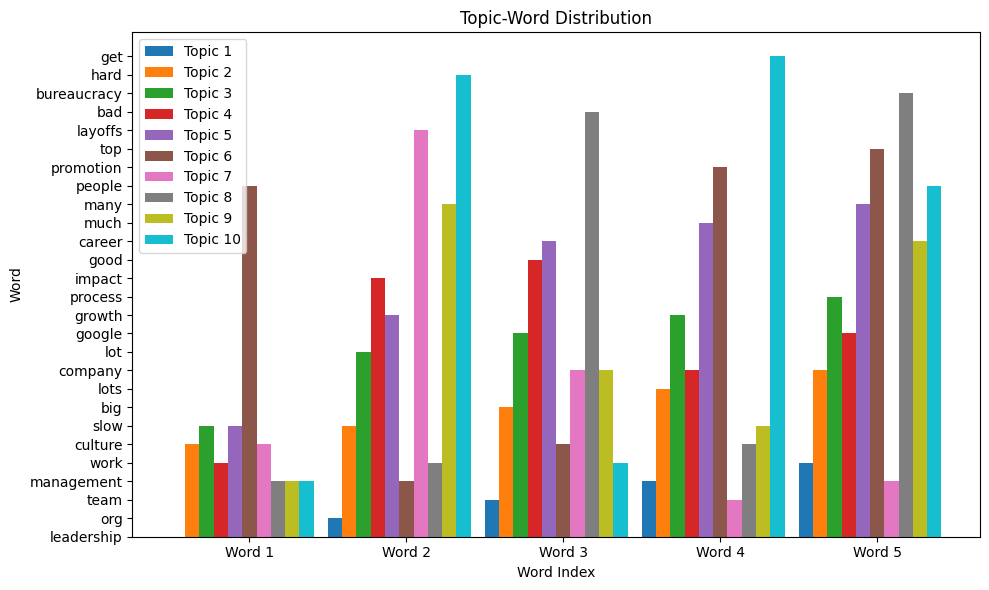

In [35]:
import matplotlib.pyplot as plt

# Assuming you have already trained the LDA model and stored it in lda_model

# Define the number of topics and top N words to display
num_topics = 10
top_n_words = 5

# Get the topics and their associated keywords
topics = lda_model.print_topics(num_topics=num_topics, num_words=top_n_words)

# Extract the keywords for each topic
topic_keywords = []
for topic_num, topic_words in topics:
    keywords = [word.split('*')[1].strip().replace('"', '') for word in topic_words.split('+')]
    topic_keywords.append(keywords)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
index = range(top_n_words)
bar_width = 1.0 / (num_topics + 1)

for i, keywords in enumerate(topic_keywords):
    ax.bar([w + i * bar_width for w in index], keywords, bar_width, label=f"Topic {i + 1}")

# Add labels and title
ax.set_xlabel('Word Index')
ax.set_ylabel('Word')
ax.set_title('Topic-Word Distribution')

# Add x-axis ticks and labels
ax.set_xticks([w + bar_width * (num_topics / 2) for w in index])
ax.set_xticklabels([f"Word {i + 1}" for i in index])

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

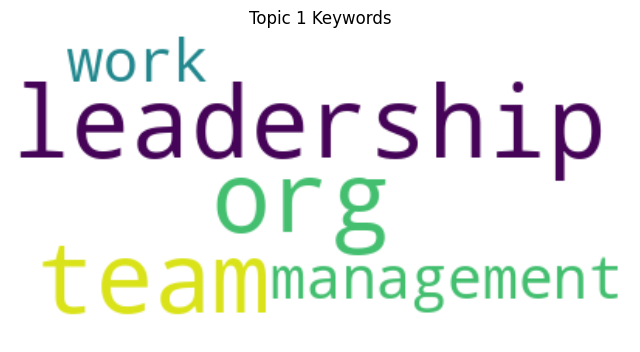

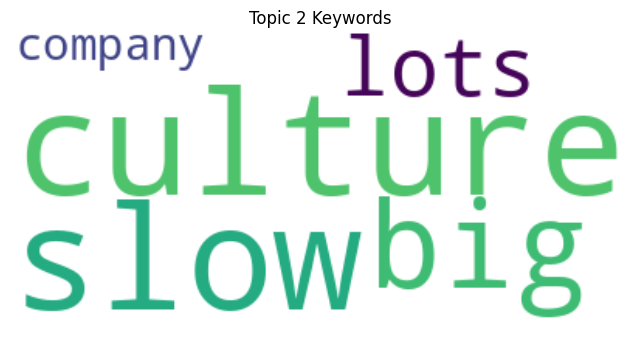

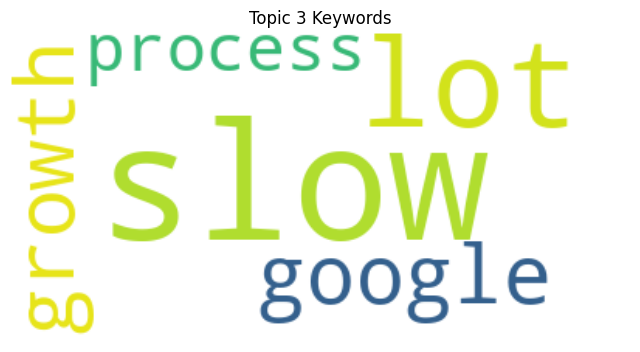

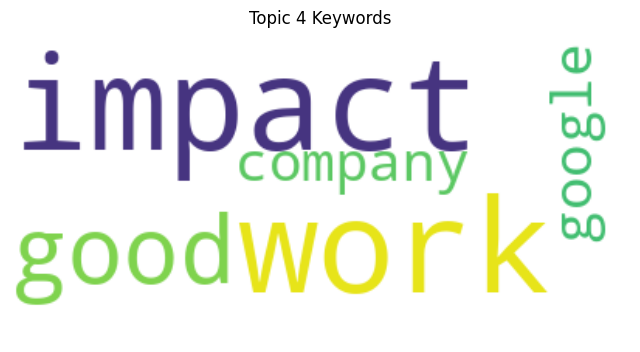

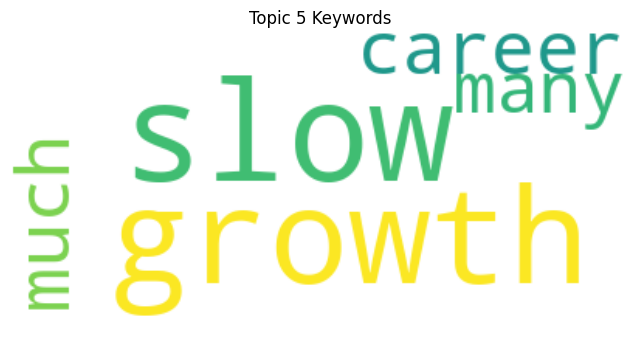

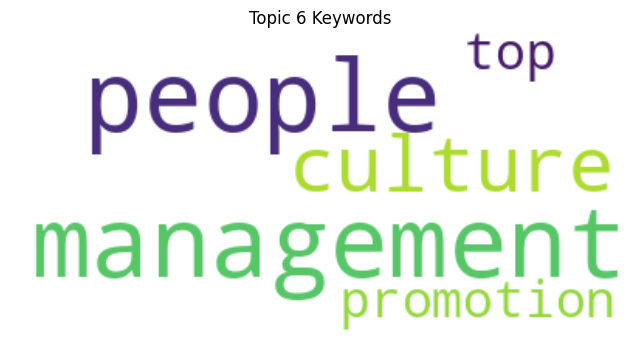

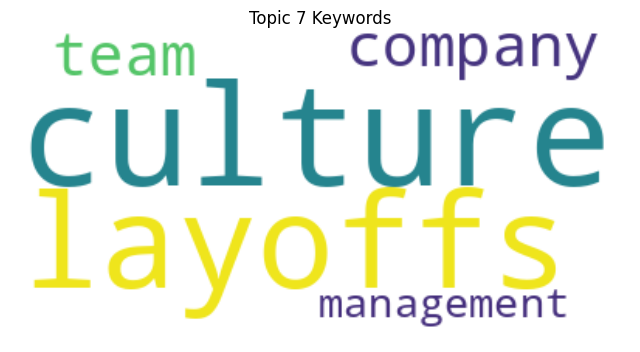

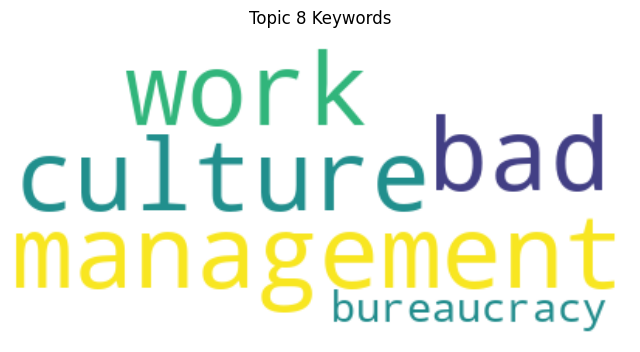

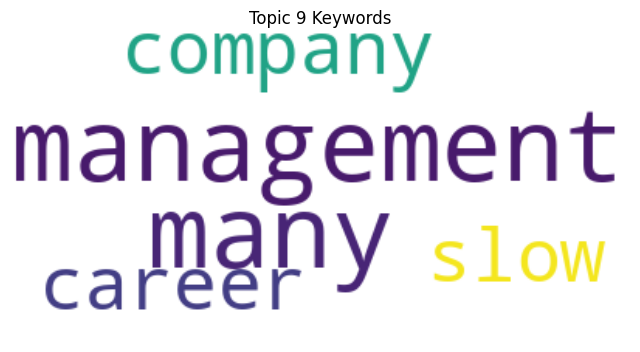

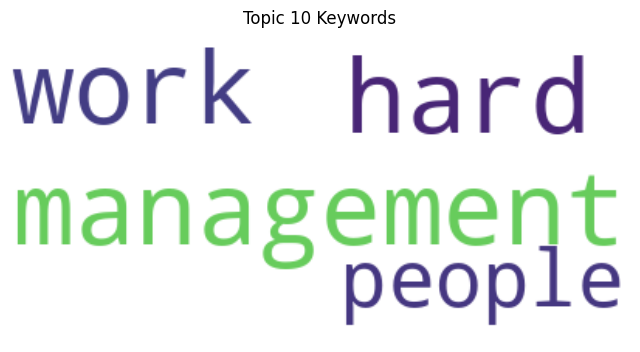

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already trained the LDA model and stored it in lda_model

# Define the number of topics and top N words to display
num_topics = 10
top_n_words = 5

# Get the topics and their associated keywords
topics = lda_model.print_topics(num_topics=num_topics, num_words=top_n_words)

# Create word cloud for each topic
for topic_num, topic_words in topics:
    keywords = [word.split('*')[1].strip().replace('"', '') for word in topic_words.split('+')]
    wordcloud = WordCloud(background_color='white').generate(' '.join(keywords))

    # Plot the word cloud
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_num + 1} Keywords')
    plt.show()